In [1]:
import numpy as np
import scipy.stats as sts

In [2]:
#Load data
dta = np.loadtxt('data/incomes.txt')

In [3]:
dta.max()

135865.02679612878

In [4]:
dta.min()

49278.80193843565

(0, 150000)

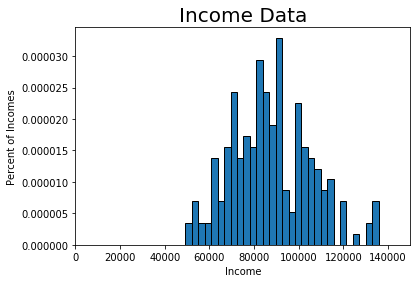

In [29]:
#Plotting
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline

num_bins = 30
count, bins, ignored = plt.hist(dta, num_bins, density=True,
                                edgecolor='k')
plt.title('Income Data', fontsize=20)
plt.xlabel(r'Income')
plt.ylabel(r'Percent of Incomes')
plt.xlim([0, 150000])

#### Lognormal PDF: $f(x|\mu = 11.0,\sigma = 0.5)$ for $0 \leq x \leq 150,000$

In [6]:
mu1 = 11
sigma1 = 0.5
x_pts1 = np.linspace(.01,150000,1000)
cut_lb1 = 0
cut_ub1 = 150000


def log_norm(x,mu,sigma, cut_lb, cut_ub):
    if cut_ub == 'None' and cut_lb == 'None':
        prob_notcut = 1.0
    elif cut_ub == 'None' and cut_lb != 'None':
        prob_notcut = 1.0 - sts.norm.cdf(cut_lb, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb == 'None':
        prob_notcut = sts.norm.cdf(cut_ub, loc=mu, scale=sigma)
    elif cut_ub != 'None' and cut_lb != 'None':
        prob_notcut = (sts.norm.cdf(cut_ub, loc=mu, scale=sigma) -
                       sts.norm.cdf(cut_lb, loc=mu, scale=sigma))
    pdf_vals = ((1/(x*sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))))/(prob_notcut)
    return pdf_vals

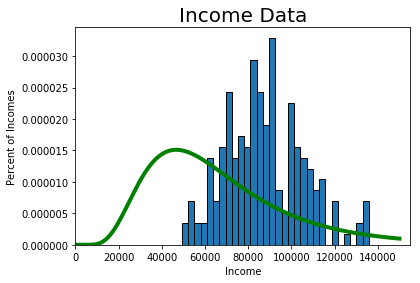

In [30]:
#Plot Log Norm function
num_bins = 30
count, bins, ignored = plt.hist(dta, num_bins, density=True,
                                edgecolor='k')
plt.title('Income Data', fontsize=20)
plt.xlabel(r'Income')
plt.ylabel(r'Percent of Incomes')
plt.xlim([0, 155000])

plt.plot(x_pts1,log_norm(x_pts1,mu1,sigma1,cut_lb1,cut_ub1),linewidth=4, color='g')

In [31]:
#Log Likelihood
def log_like(xvals,mu,sigma,cut_lb,cut_ub):
    #pdf_vals = longnorm.pdf(xvals,s=abs(sigma))
    pdf_vals = log_norm(xvals, mu, abs(sigma),cut_lb,cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_like_value = ln_pdf_vals.sum()
    return log_like_value

print('Log-likelihood 1: ', log_like(dta, mu1, sigma1,cut_lb1,cut_ub1))

Log-likelihood 1:  -2385.856997808558


#### Estimation of parameters with MLE


In [9]:
import scipy.optimize as opt

def crit_func(params, *args):
    mu, sigma = params
    x, cut_lb, cut_ub = args
    log_lik_value = log_like(x, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_value
    
    return neg_log_lik_val

In [10]:
#Mu and Sigma estimates
params_init = np.array([mu1, sigma1])
mle_args = (dta, cut_lb1, cut_ub1)
results = opt.minimize(crit_func, params_init,method='L-BFGS-B', args=(mle_args),tol=1e-7)
mu_MLE, sig_MLE = results.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
results

mu_MLE= 11.359016694899545  sig_MLE= 0.20817012633692217


      fun: 2241.7193016884776
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-0.02910383, -0.06639311])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 36
      nit: 8
   status: 0
  success: True
        x: array([11.35901669,  0.20817013])

In [11]:
#Likelihood function
log_like(dta,mu_MLE,sig_MLE,cut_lb1, cut_ub1)

-2241.7193016884776

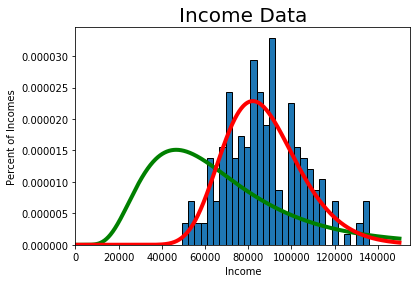

In [12]:
#Graph
#Histogram of data
num_bins = 30
count, bins, ignored = plt.hist(dta, num_bins, density=True,
                                edgecolor='k')
plt.title('Income Data', fontsize=20)
plt.xlabel(r'Income')
plt.ylabel(r'Percent of Incomes')
plt.xlim([0, 155000])

#Lognormal
plt.plot(x_pts1,log_norm(x_pts1,mu1,sigma1,cut_lb1,cut_ub1),linewidth=4, color='g')

#Log likelihood estimates
plt.plot(x_pts1,log_norm(x_pts1,mu_MLE,sig_MLE,cut_lb1,cut_ub1),linewidth=4, color='r')

#### Likelihood ratio test

In [33]:
log_lik_h0 = log_like(dta, mu1, sigma1, cut_lb1, cut_ub1)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_like(dta, mu_MLE, sig_MLE, cut_lb1, cut_ub1)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

hypothesis value log likelihood -2385.856997808558
MLE log likelihood -2241.7193016884776
likelihood ratio value 288.2753922401607
chi squared of H0 with 2 degrees of freedom p-value =  0.0


#### Plot cdf

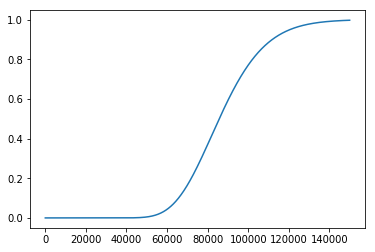

In [35]:
from scipy.stats import lognorm

distr = lognorm.cdf(x_pts1,sig_MLE, 0, np.exp(mu_MLE))

#Plot cdf
plt.plot(x_pts1,distr)

In [36]:
#less than 75k
less75k = np.interp(75000,x_pts1,distr)

#More than 100K
more100k = 1- (np.interp(100000,x_pts1,distr))

print('Probability of earning less than 75k = ', less75k)
print('Probability of earning more than 100k = ', more100k)

Probability of earning less than 75k =  0.26023851539857523
Probability of earning more than 100k =  0.229849891112072
